# BareMinimum pytorch implementation of a simple neural network

In [10]:
#Importing the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#create a data loader
from torch.utils.data import DataLoader, TensorDataset
# Plot the loss over epochs
import matplotlib.pyplot as plt


In [8]:
#Generating a synthetic classification dataset
from sklearn.datasets import make_classification
import torch

# Generate synthetic classification dataset (100 samples, 3 features, 2 classes)
# Fix the error by ensuring n_informative + n_redundant + n_repeated < n_features
X, y = make_classification(
    n_samples=100, 
    n_features=3, 
    n_informative=2,  # Explicitly set n_informative
    n_redundant=0,    # Explicitly set n_redundant
    n_repeated=0,     # Explicitly set n_repeated
    n_classes=2, 
    random_state=42
)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert features to tensor
y_tensor = torch.tensor(y, dtype=torch.long)  # Convert labels to tensor

print(X_tensor.shape, y_tensor.shape)

print(X_tensor)
print(y_tensor)


torch.Size([100, 3]) torch.Size([100])
tensor([[ 1.2777,  1.3554,  1.1551],
        [ 1.2669,  1.0226, -1.0832],
        [ 0.4050,  1.8047, -0.1499],
        [-0.6516, -1.5598, -1.9249],
        [-0.0595,  0.2542, -1.7953],
        [-0.5602,  1.5723,  1.4992],
        [ 0.1865, -0.7937, -0.9311],
        [-0.0209,  0.6806,  1.0270],
        [-0.2526, -2.1711, -0.0486],
        [-0.7077,  0.8260, -1.0538],
        [-1.0244,  0.8524, -1.1466],
        [-1.4301,  0.5594,  2.3887],
        [-1.5194,  1.3122, -0.7173],
        [-0.4930,  0.6653,  0.8863],
        [ 2.3147, -1.6583, -1.5713],
        [-0.8290,  1.1787,  1.0918],
        [ 0.2810, -0.5677,  1.3899],
        [ 0.7590, -0.0713,  0.0890],
        [ 0.6296,  0.2506,  0.1398],
        [ 0.6104,  2.5298,  1.9409],
        [-1.9521, -2.3280, -0.1759],
        [-0.7153, -1.4074, -1.5683],
        [ 0.6796, -0.5396, -0.7243],
        [-1.2378, -0.3314,  1.5693],
        [ 0.8129,  0.4805,  0.5491],
        [ 0.0102, -0.0532,  1.8561],

# Training a neural network (input->hidden->hidden_2->output) (mini_batch training)

Epoch [1/2000], Loss: 0.7101
Epoch [2/2000], Loss: 0.7045
Epoch [3/2000], Loss: 0.7014
Epoch [4/2000], Loss: 0.6982
Epoch [5/2000], Loss: 0.7069
Epoch [6/2000], Loss: 0.6875
Epoch [7/2000], Loss: 0.7122
Epoch [8/2000], Loss: 0.6881
Epoch [9/2000], Loss: 0.6992
Epoch [10/2000], Loss: 0.6948
Epoch [11/2000], Loss: 0.6818
Epoch [12/2000], Loss: 0.6804
Epoch [13/2000], Loss: 0.6925
Epoch [14/2000], Loss: 0.6928
Epoch [15/2000], Loss: 0.6852
Epoch [16/2000], Loss: 0.6852
Epoch [17/2000], Loss: 0.6925
Epoch [18/2000], Loss: 0.6808
Epoch [19/2000], Loss: 0.6878
Epoch [20/2000], Loss: 0.6835
Epoch [21/2000], Loss: 0.6827
Epoch [22/2000], Loss: 0.6918
Epoch [23/2000], Loss: 0.6956
Epoch [24/2000], Loss: 0.6795
Epoch [25/2000], Loss: 0.6731
Epoch [26/2000], Loss: 0.6848
Epoch [27/2000], Loss: 0.6778
Epoch [28/2000], Loss: 0.6804
Epoch [29/2000], Loss: 0.6843
Epoch [30/2000], Loss: 0.6667
Epoch [31/2000], Loss: 0.6801
Epoch [32/2000], Loss: 0.6677
Epoch [33/2000], Loss: 0.6762
Epoch [34/2000], Lo

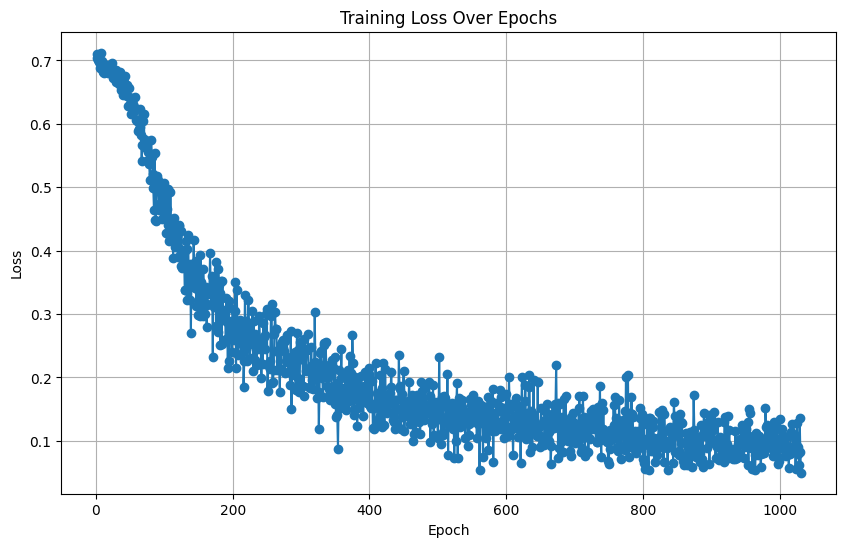

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class SimpleNet(nn.Module):   
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.3):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input -> Hidden
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout after activation
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Hidden -> Hidden_2
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)  
        self.fc3 = nn.Linear(hidden_size, output_size)  # Hidden_2 -> Output

    def forward(self, x):   
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Apply dropout after activation
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Apply dropout after activation
        x = self.fc3(x)  # Final output layer
        return x

# Model Initialization
input_size = 3  
hidden_size = 5  
output_size = 2  
dropout_rate = 0.3  
model = SimpleNet(input_size, hidden_size, output_size, dropout_rate)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

num_epochs = 2000
losses = []

for epoch in range(num_epochs):  
    epoch_loss = 0.0
    batch_count = 0
    
    for X_batch, y_batch in train_loader:  
        outputs = model(X_batch)  
        loss = criterion(outputs, y_batch)  
        
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
        
        epoch_loss += loss.item()
        batch_count += 1
    
    avg_loss = epoch_loss / batch_count
    losses.append(avg_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Early stopping criterion
    if avg_loss < 0.05:
        print(f"Converged at epoch {epoch+1}")
        break

# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
